## **Time sereis model building**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import ARIMA
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Dataset/tsla.CSV')
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2019-05-21,39.551998,41.480000,39.208000,41.015999,90019500,0,0.0
1,2019-05-22,39.820000,40.787998,38.355999,38.546001,93426000,0,0.0
2,2019-05-23,38.868000,39.894001,37.243999,39.098000,132735500,0,0.0
3,2019-05-24,39.966000,39.995998,37.750000,38.125999,70683000,0,0.0
4,2019-05-28,38.240002,39.000000,37.570000,37.740002,51564500,0,0.0


In [3]:
# Univarient Timeseries
# Here we are taking just Date and Close Features

stock_data = df[['Date','Close']]
stock_data.head()

,Date,Close
0,2019-05-21,41.015999
1,2019-05-22,38.546001
2,2019-05-23,39.098000
3,2019-05-24,38.125999
4,2019-05-28,37.740002


In [4]:
# Converting the Date column as DateTime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

/tmp/ipykernel_13912/3733530350.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['Date'] = pd.to_datetime(stock_data['Date'])


In [5]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    758 non-null    datetime64[ns]
 1   Close   758 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [6]:
# Set Date as Index
stock_data = stock_data.set_index("Date")
stock_data.head()

,Close
Date,
2019-05-21,41.015999
2019-05-22,38.546001
2019-05-23,39.098000
2019-05-24,38.125999
2019-05-28,37.740002


In [7]:
# Now we will convert the Non-Stationary data to Stationary by using differencing
df_close = stock_data['Close']
df_close = df_close.diff() # By Default it's one level differencing
df_close = df_close.dropna() # We removed the Null Values

In [8]:
# Now we check the data is stationary or not
from statsmodels.tsa.stattools import adfuller
adft = adfuller(df_close)
pd.Series(adft[0:4], index=['test stats', 'p-value', 'lag', 'data points'])

test stats    -8.324564e+00
p-value        3.498786e-13
lag            8.000000e+00
data points    7.480000e+02
dtype: float64

In [9]:
# Train, Test Split
train_data = stock_data['Close'][0:-60]
test_data = stock_data['Close'][-60:]

In [10]:
history = train_data.to_list()
history

[41.01599884033203,
 38.54600143432617,
 39.09799957275391,
 38.1259994506836,
 37.7400016784668,
 37.97200012207031,
 37.64400100708008,
 37.03200149536133,
 35.79399871826172,
 38.720001220703125,
 39.31800079345703,
 41.18999862670898,
 40.900001525878906,
 42.57600021362305,
 43.41999816894531,
 41.85200119018555,
 42.78200149536133,
 42.98400115966797,
 45.00600051879883,
 44.948001861572266,
 45.2859992980957,
 43.92399978637695,
 44.37200164794922,
 44.72800064086914,
 43.95199966430664,
 43.854000091552734,
 44.56800079345703,
 44.69200134277344,
 45.43399810791016,
 44.90999984741211,
 46.97999954223633,
 46.619998931884766,
 46.06800079345703,
 46.012001037597656,
 47.78400039672852,
 47.720001220703125,
 49.01599884033203,
 50.70000076293945,
 50.47600173950195,
 50.97200012207031,
 50.70800018310547,
 51.63600158691406,
 51.13600158691406,
 52.03400039672852,
 52.97600173950195,
 45.76399993896485,
 45.608001708984375,
 47.15399932861328,
 48.45199966430664,
 48.32199859619

In [11]:
# Make the ARIMA Model
model = ARIMA(history, order=(1,1,1))
model

In [12]:
model = model.fit()

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  698
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3150.350
Date:                Sun, 23 Jul 2023   AIC                           6306.700
Time:                        12:11:50   BIC                           6320.340
Sample:                             0   HQIC                          6311.974
                                - 698                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2397      0.699      0.343      0.731      -1.129       1.609
ma.L1         -0.2713      0.690     -0.393      0.694      -1.623       1.080
sigma2       493.6767     11.690     42.231      0.000     470.765     516.588
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              2111.30
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):              31.69   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
# Make the Forecasting
model.forecast()

array([800.20438321])

In [15]:
test_data[0]

809.8699951171875

In [16]:
# Mean Square Error
mse = mean_squared_error([test_data[0]], model.forecast())
mse

93.42405358558581

In [17]:
# Root Mean Square Error
np.sqrt(mse)

9.665611909526774

## Hyperparameter Tuning

In [18]:
def train_arima_model(X,y,arima_order):
    predictions = []
    history = train_data.to_list()
    
    for i in y:
        model = ARIMA(history, order=arima_order)
        model = model.fit()
        predictions.append(model.forecast()[0])
        history.append(i)
        
    rmse = np.sqrt(mean_squared_error(y, predictions))
    return rmse

In [19]:
train_arima_model(train_data, test_data, (1,1,1))

39.554618172209246

In [20]:
def evaluate_arima_mode(train_data, test_data, p_values, d_values, q_values):
    best_score = float("inf")
    best_cfg = None
    
    for p in p_values:
        for d in d_values:
            for q in q_values:
                arima_order=(p,d,q)
                try:
                    score = train_arima_model(train_data,test_data,arima_order)
                    if score<best_score:
                        best_score = score
                        best_cfg = arima_order
                        print(f"ARIMA = {best_cfg} RMSE = {best_score}")
                except:
                    continue
    print(f"Best ARIMA Config : {best_cfg} and RMSE = {best_score}")

In [21]:
# Ignore Errors
import warnings
warnings.filterwarnings('ignore')

p_values = range(3)
d_values = range(3)
q_values = range(3)

evaluate_arima_mode(train_data, test_data, p_values, d_values, q_values)

ARIMA = (0, 0, 0) RMSE = 457.41441617163724
ARIMA = (0, 0, 1) RMSE = 241.16346281466883
ARIMA = (0, 0, 2) RMSE = 157.9823799556793
ARIMA = (0, 1, 0) RMSE = 39.51639749939755
ARIMA = (0, 1, 1) RMSE = 39.482499221189
ARIMA = (1, 0, 0) RMSE = 39.47656545395394
ARIMA = (1, 0, 1) RMSE = 39.449380126424956
ARIMA = (2, 0, 0) RMSE = 39.43992944070974
Best ARIMA Config : (2, 0, 0) and RMSE = 39.43992944070974


In [22]:
# Use the best parameters to make the Model

predictions = []
history = train_data.to_list()

for y in test_data:
    model = ARIMA(history, order=(2, 0, 0))
    model = model.fit()
    predictions.append(model.forecast(alpha=0.05)[0])
    history.append(y)

rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(rmse)

39.43992944070974


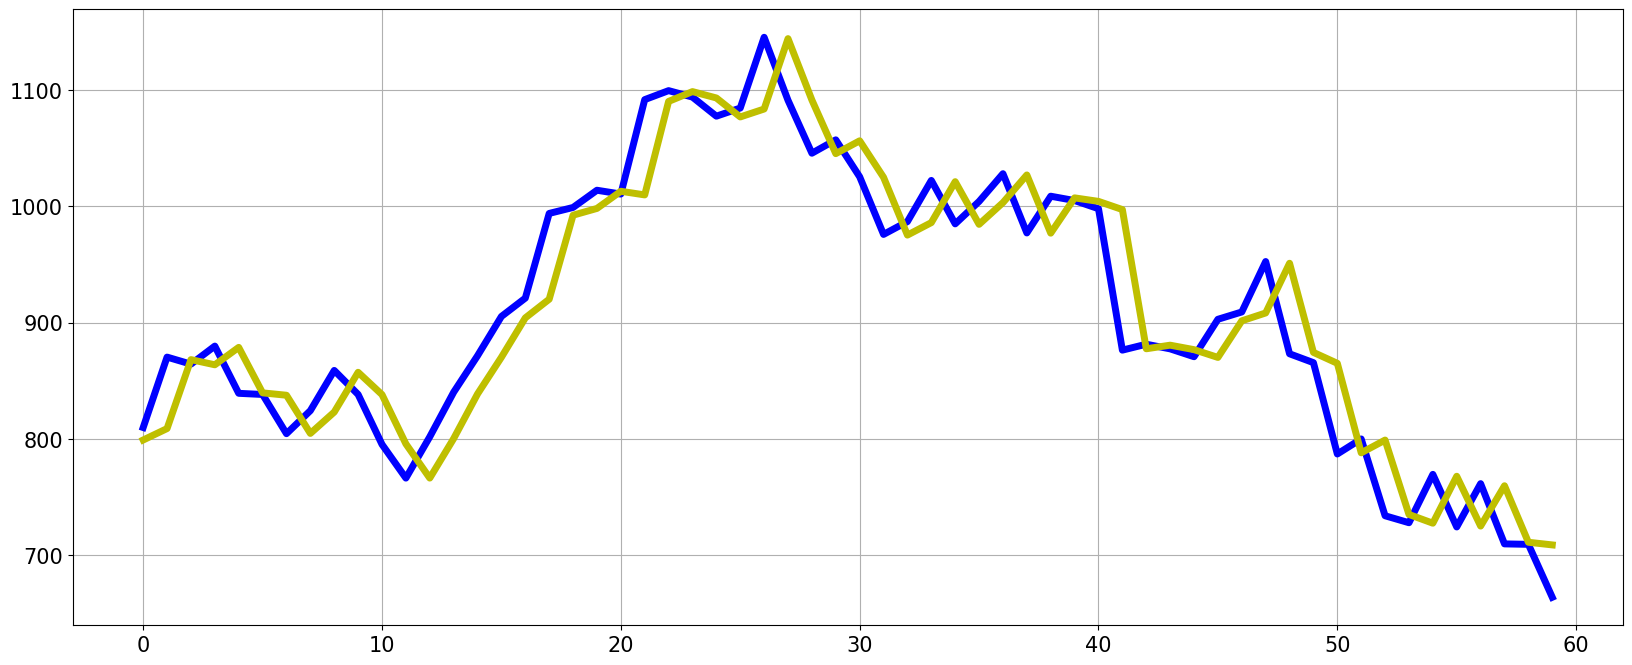

In [23]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, color='b', linewidth=5, label='True Test Value')
plt.plot(range(len(predictions)), predictions, color='y', linewidth=5, label='Prediction Value')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [24]:
pred_series = pd.Series(predictions, index=test_data.index)
pred_series

Date
2022-02-25     799.142618
2022-02-28     808.979297
2022-03-01     868.263606
2022-03-02     863.810221
2022-03-03     878.785773
2022-03-04     839.682001
2022-03-07     837.633070
2022-03-08     804.810805
2022-03-09     823.170865
2022-03-10     857.363033
2022-03-11     838.198455
2022-03-14     795.799373
2022-03-15     766.387642
2022-03-16     800.356718
2022-03-17     838.734421
2022-03-18     870.330558
2022-03-21     904.155513
2022-03-22     920.205868
2022-03-23     992.457369
2022-03-24     998.271733
2022-03-25    1013.030080
2022-03-28    1009.895036
2022-03-29    1090.296230
2022-03-30    1098.738698
2022-03-31    1093.258828
2022-04-01    1076.942969
2022-04-04    1083.765367
2022-04-05    1144.294439
2022-04-06    1091.493330
2022-04-07    1045.393848
2022-04-08    1056.426525
2022-04-11    1025.031468
2022-04-12     975.357791
2022-04-13     986.075150
2022-04-14    1021.297355
2022-04-18     984.596602
2022-04-19    1003.269782
2022-04-20    1027.070659
2022-04

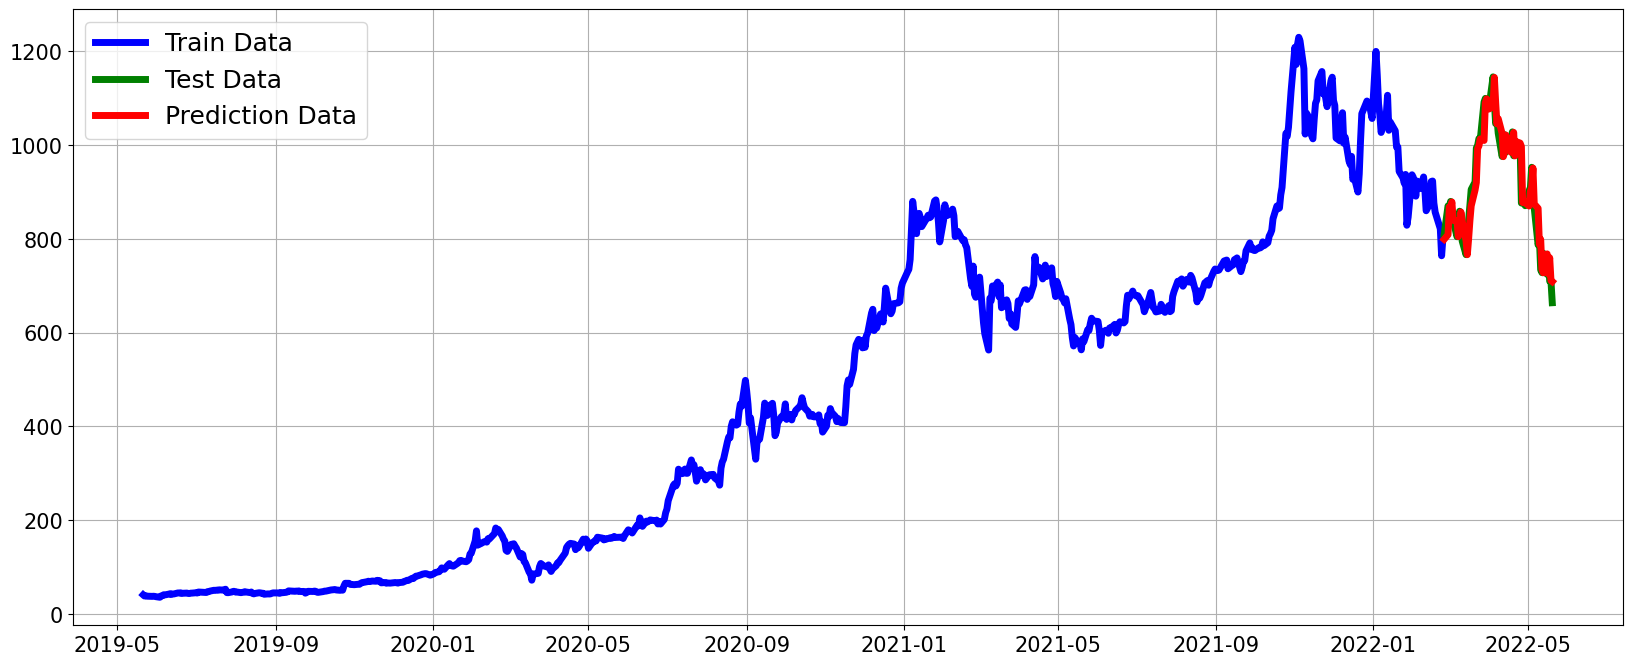

In [25]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot(train_data, color='b', linewidth=5, label='Train Data')
plt.plot(test_data, color='g', linewidth=5, label='Test Data')
plt.plot(pred_series, color='r', linewidth=5, label='Prediction Data')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(loc='upper left', fontsize=18)
plt.show()

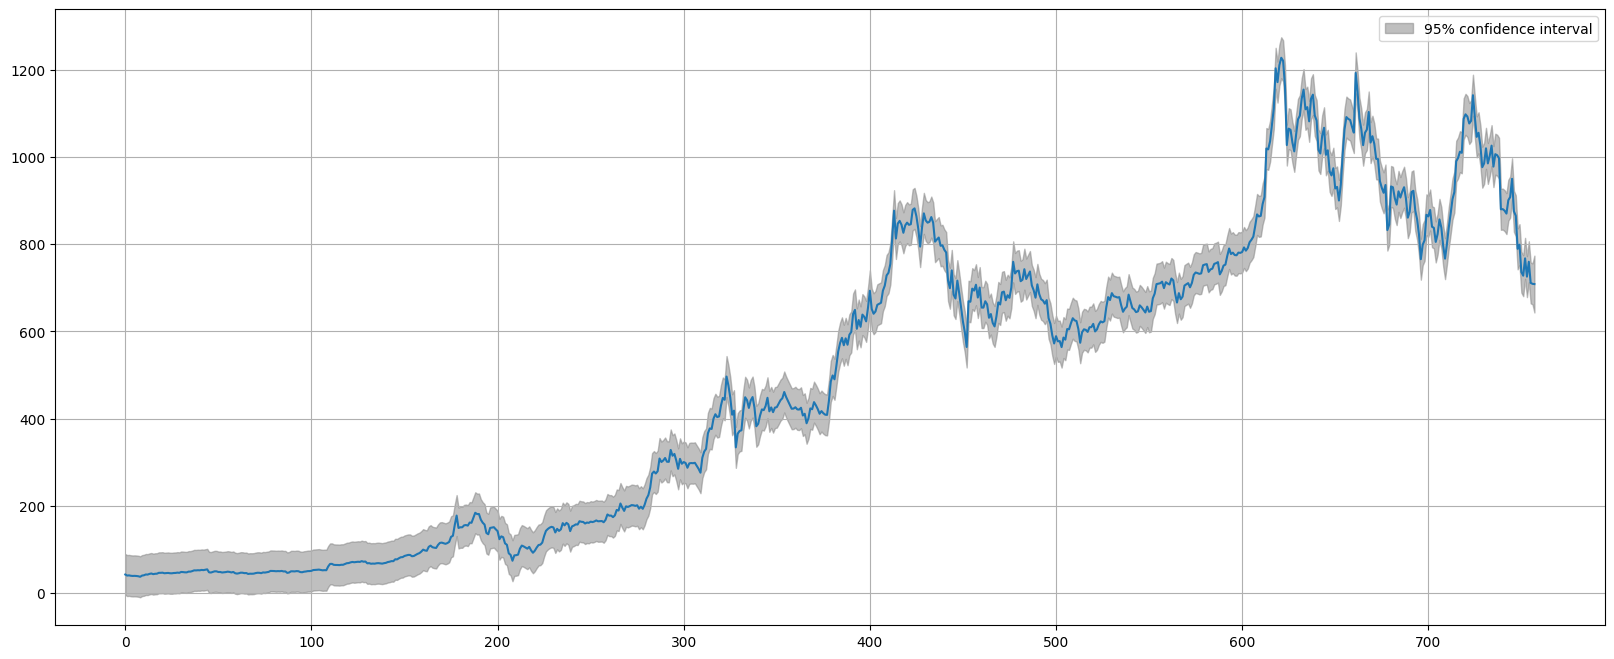

In [29]:
# Data Prediction
from statsmodels.graphics.tsaplots import plot_predict
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot()
plot_predict(result=model, start=1, end=len(train_data)+60, ax=ax)
plt.grid(True)
plt.show()

## **SARIMA MODEL**

In [34]:
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.statespace.sarimax import SARIMAX

predictions = []
history = train_data.to_list()

for y in test_data:
    model = SARIMAX(history, order=(2, 0, 0), seasonal_order=(1,1,1,3))
    model = model.fit()
    predictions.append(model.forecast(alpha=0.05)[0])
    history.append(y)

rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(rmse)

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70981D+00    |proj g|=  2.96280D-01

At iterate    5    f=  4.56931D+00    |proj g|=  6.97082D-02

At iterate   10    f=  4.51983D+00    |proj g|=  2.09639D-02

At iterate   15    f=  4.50542D+00    |proj g|=  4.06550D-02


 This problem is unconstrained.



At iterate   20    f=  4.50409D+00    |proj g|=  3.92738D-04

At iterate   25    f=  4.50409D+00    |proj g|=  3.05841D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     40      1     0     0   9.045D-06   4.504D+00
  F =   4.5040886128601043     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.70956D+00    |proj g|=  2.97114D-01

At iterate    5    f=  4.56892D+00    |proj g|=  7.04285D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  4.50540D+00    |proj g|=  4.16155D-02

At iterate   20    f=  4.50355D+00    |proj g|=  2.16942D-04

At iterate   25    f=  4.50354D+00    |proj g|=  2.55471D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     26     37      1     0     0   9.678D-06   4.504D+00
  F =   4.5035395372094724     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.71500D+00    |proj g|=  2.84044D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.51335D+00    |proj g|=  1.46001D-03

At iterate   20    f=  4.51245D+00    |proj g|=  3.51920D-02

At iterate   25    f=  4.51157D+00    |proj g|=  3.12608D-04

At iterate   30    f=  4.51141D+00    |proj g|=  7.18842D-03

At iterate   35    f=  4.51035D+00    |proj g|=  3.03993D-03

At iterate   40    f=  4.51028D+00    |proj g|=  1.51532D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     47      1     0     0   1.515D-06   4.510D+00
  F =   4.5102755052552990     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.51246D+00    |proj g|=  4.62923D-03

At iterate   20    f=  4.51052D+00    |proj g|=  1.34720D-02

At iterate   25    f=  4.51011D+00    |proj g|=  1.07991D-03

At iterate   30    f=  4.50987D+00    |proj g|=  1.99116D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     43      1     0     0   7.397D-06   4.510D+00
  F =   4.5098729292700419     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.51083D+00    |proj g|=  6.75754D-04

At iterate   30    f=  4.51081D+00    |proj g|=  2.43208D-03

At iterate   35    f=  4.51020D+00    |proj g|=  2.57009D-02

At iterate   40    f=  4.50954D+00    |proj g|=  7.27597D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     51      1     0     0   3.455D-06   4.510D+00
  F =   4.5095387139372889     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.51136D+00    |proj g|=  1.74269D-03

At iterate   30    f=  4.51084D+00    |proj g|=  2.51398D-02

At iterate   35    f=  4.51032D+00    |proj g|=  3.79103D-03

At iterate   40    f=  4.51029D+00    |proj g|=  4.66837D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     47      1     0     0   1.637D-06   4.510D+00
  F =   4.5102908714221348     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.57724D+00    |proj g|=  6.61116D-02

At iterate   10    f=  4.52695D+00    |proj g|=  2.59571D-02

At iterate   15    f=  4.51284D+00    |proj g|=  4.56338D-03

At iterate   20    f=  4.51081D+00    |proj g|=  2.84690D-02

At iterate   25    f=  4.51005D+00    |proj g|=  4.31743D-04

At iterate   30    f=  4.50981D+00    |proj g|=  8.56250D-03

At iterate   35    f=  4.50976D+00    |proj g|=  2.58109D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     43      1     0     0   1.443D-06   4.510D+00
  F =   4.5097587461189761     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   15    f=  4.51411D+00    |proj g|=  8.42714D-04

At iterate   20    f=  4.51356D+00    |proj g|=  1.21661D-02

At iterate   25    f=  4.51211D+00    |proj g|=  5.02362D-03

At iterate   30    f=  4.51204D+00    |proj g|=  1.38693D-03

At iterate   35    f=  4.51134D+00    |proj g|=  2.78364D-02

At iterate   40    f=  4.51074D+00    |proj g|=  3.85212D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     55      1     0     0   7.550D-07   4.511D+00
  F =   4.5107351971101517     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   25    f=  4.51145D+00    |proj g|=  1.04914D-03

At iterate   30    f=  4.51141D+00    |proj g|=  6.40568D-03

At iterate   35    f=  4.51116D+00    |proj g|=  3.01072D-03

At iterate   40    f=  4.51115D+00    |proj g|=  1.71010D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     48      1     0     0   3.758D-06   4.511D+00
  F =   4.5111488560321096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  4.57942D+00    |proj g|=  6.58326D-02

At iterate   10    f=  4.52895D+00    |proj g|=  2.95465D-02

At iterate   15    f=  4.51465D+00    |proj g|=  4.34036D-03

At iterate   20    f=  4.51244D+00    |proj g|=  2.72661D-02

At iterate   25    f=  4.51170D+00    |proj g|=  2.98174D-03

At iterate   30    f=  4.51144D+00    |proj g|=  1.41274D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     41      1     0     0   1.613D-05   4.511D+00
  F =   4.5114417393287445     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.51485D+00    |proj g|=  7.28356D-04

At iterate   20    f=  4.51447D+00    |proj g|=  1.07069D-02

At iterate   25    f=  4.51305D+00    |proj g|=  1.54167D-02

At iterate   30    f=  4.51249D+00    |proj g|=  7.49465D-03

At iterate   35    f=  4.51130D+00    |proj g|=  3.59946D-03

At iterate   40    f=  4.51128D+00    |proj g|=  8.10019D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     52      1     0     0   8.100D-06   4.511D+00
  F =   4.5112815642146842     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.51598D+00    |proj g|=  5.19983D-03

At iterate   20    f=  4.51421D+00    |proj g|=  5.55651D-02

At iterate   25    f=  4.51244D+00    |proj g|=  5.27881D-04

At iterate   30    f=  4.51232D+00    |proj g|=  2.04809D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     44      1     0     0   2.650D-05   4.512D+00
  F =   4.5122996768907058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.51403D+00    |proj g|=  1.27661D-03

At iterate   30    f=  4.51379D+00    |proj g|=  6.51281D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     37      1     0     0   1.754D-05   4.514D+00
  F =   4.5137916186269980     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72168D+00    |proj g|=  2.80363D-01

At iterate    5    f=  4.58306D+00    |proj g|=  6.50702D-02

At iter

 This problem is unconstrained.



At iterate   15    f=  4.51804D+00    |proj g|=  3.66895D-03

At iterate   20    f=  4.51609D+00    |proj g|=  3.69620D-02

At iterate   25    f=  4.51511D+00    |proj g|=  1.05331D-03

At iterate   30    f=  4.51494D+00    |proj g|=  2.67703D-03

At iterate   35    f=  4.51489D+00    |proj g|=  9.93154D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     43      1     0     0   8.850D-06   4.515D+00
  F =   4.5148895203246875     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   25    f=  4.51758D+00    |proj g|=  4.68403D-04

At iterate   30    f=  4.51731D+00    |proj g|=  9.97854D-04

At iterate   35    f=  4.51731D+00    |proj g|=  5.40435D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     41      1     0     0   5.404D-05   4.517D+00
  F =   4.5173084146435816     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.72219D+00    |proj g|=  2.71022D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.53447D+00    |proj g|=  2.84492D-02

At iterate   15    f=  4.52047D+00    |proj g|=  4.17588D-03

At iterate   20    f=  4.51889D+00    |proj g|=  3.85192D-02

At iterate   25    f=  4.51763D+00    |proj g|=  3.98023D-04

At iterate   30    f=  4.51748D+00    |proj g|=  6.60900D-03

At iterate   35    f=  4.51737D+00    |proj g|=  6.14401D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     46      1     0     0   3.101D-05   4.517D+00
  F =   4.5173696566242842     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.52140D+00    |proj g|=  6.06430D-03

At iterate   20    f=  4.51984D+00    |proj g|=  4.57590D-02

At iterate   25    f=  4.51865D+00    |proj g|=  2.75606D-04

At iterate   30    f=  4.51847D+00    |proj g|=  2.75321D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     41      1     0     0   2.826D-05   4.518D+00
  F =   4.5184192097036595     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.51882D+00    |proj g|=  2.80811D-03

At iterate   30    f=  4.51860D+00    |proj g|=  1.32345D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     41      1     0     0   4.452D-06   4.519D+00
  F =   4.5185981466429519     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73353D+00    |proj g|=  2.86168D-01

At iterate    5    f=  4.59806D+00    |proj g|=  1.41491D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.52789D+00    |proj g|=  1.36855D-03

At iterate   20    f=  4.52693D+00    |proj g|=  3.58116D-02

At iterate   25    f=  4.52500D+00    |proj g|=  7.85340D-03

At iterate   30    f=  4.52493D+00    |proj g|=  2.86677D-03

At iterate   35    f=  4.52411D+00    |proj g|=  9.87495D-03

At iterate   40    f=  4.52378D+00    |proj g|=  7.60378D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     42     50      1     0     0   5.932D-06   4.524D+00
  F =   4.5237835662388859     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  4.52593D+00    |proj g|=  5.60287D-02

At iterate   25    f=  4.52403D+00    |proj g|=  5.95440D-04

At iterate   30    f=  4.52394D+00    |proj g|=  5.44894D-03

At iterate   35    f=  4.52333D+00    |proj g|=  1.20013D-02

At iterate   40    f=  4.52316D+00    |proj g|=  5.76241D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     40     47      1     0     0   5.762D-06   4.523D+00
  F =   4.5231583532044475     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   25    f=  4.52409D+00    |proj g|=  8.56119D-03

At iterate   30    f=  4.52353D+00    |proj g|=  1.15505D-02

At iterate   35    f=  4.52324D+00    |proj g|=  1.81325D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     44      1     0     0   1.988D-05   4.523D+00
  F =   4.5232408410344043     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.73949D+00    |proj g|=  3.04571D-01


 This problem is unconstrained.



At iterate    5    f=  4.59195D+00    |proj g|=  6.66373D-02

At iterate   10    f=  4.54075D+00    |proj g|=  2.82926D-02

At iterate   15    f=  4.52596D+00    |proj g|=  4.69418D-03

At iterate   20    f=  4.52409D+00    |proj g|=  3.84452D-02

At iterate   25    f=  4.52296D+00    |proj g|=  6.29306D-04

At iterate   30    f=  4.52287D+00    |proj g|=  5.55884D-03

At iterate   35    f=  4.52276D+00    |proj g|=  1.32708D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     44      1     0     0   3.963D-05   4.523D+00
  F =   4.5227584502831357     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  4.53429D+00    |proj g|=  2.04156D-03

At iterate   20    f=  4.53255D+00    |proj g|=  1.92613D-02

At iterate   25    f=  4.53153D+00    |proj g|=  3.09043D-04

At iterate   30    f=  4.53121D+00    |proj g|=  4.57560D-03

At iterate   35    f=  4.53115D+00    |proj g|=  2.53957D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   2.540D-06   4.531D+00
  F =   4.5311494347251884     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  4.53206D+00    |proj g|=  1.81954D-02

At iterate   25    f=  4.53100D+00    |proj g|=  3.09957D-04

At iterate   30    f=  4.53097D+00    |proj g|=  6.27326D-03

At iterate   35    f=  4.53083D+00    |proj g|=  3.13545D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     44      1     0     0   2.295D-05   4.531D+00
  F =   4.5308276391868114     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.53058D+00    |proj g|=  5.98021D-04

At iterate   30    f=  4.53044D+00    |proj g|=  5.78754D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     42      1     0     0   1.146D-06   4.530D+00
  F =   4.5303856049906379     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74828D+00    |proj g|=  3.05561D-01

At iterate    5    f=  4.61182D+00    |proj g|=  1.50869D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.53290D+00    |proj g|=  1.25471D-03

At iterate   20    f=  4.53153D+00    |proj g|=  3.73486D-02

At iterate   25    f=  4.53031D+00    |proj g|=  4.73594D-04

At iterate   30    f=  4.53019D+00    |proj g|=  1.98537D-03

At iterate   35    f=  4.53011D+00    |proj g|=  1.23683D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     43      1     0     0   3.725D-06   4.530D+00
  F =   4.5301099143646164     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  4.53104D+00    |proj g|=  3.55028D-02

At iterate   25    f=  4.52990D+00    |proj g|=  2.46590D-04

At iterate   30    f=  4.52981D+00    |proj g|=  4.52411D-03

At iterate   35    f=  4.52973D+00    |proj g|=  6.19588D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     47      1     0     0   3.681D-07   4.530D+00
  F =   4.5297268308291407     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  4.53356D+00    |proj g|=  2.17180D-02

At iterate   25    f=  4.53301D+00    |proj g|=  7.75709D-04

At iterate   30    f=  4.53285D+00    |proj g|=  9.29067D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     39      1     0     0   4.429D-05   4.533D+00
  F =   4.5328540316400687     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74951D+00    |proj g|=  2.93461D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.56297D+00    |proj g|=  4.55586D-02

At iterate   15    f=  4.53934D+00    |proj g|=  1.73885D-03

At iterate   20    f=  4.53707D+00    |proj g|=  1.82246D-02

At iterate   25    f=  4.53631D+00    |proj g|=  4.87605D-04

At iterate   30    f=  4.53629D+00    |proj g|=  4.60540D-03

At iterate   35    f=  4.53612D+00    |proj g|=  4.47081D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     39     43      1     0     0   4.848D-06   4.536D+00
  F =   4.5361224037371430     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  4.53870D+00    |proj g|=  2.05433D-02

At iterate   25    f=  4.53747D+00    |proj g|=  3.80359D-04

At iterate   30    f=  4.53741D+00    |proj g|=  5.36550D-03

At iterate   35    f=  4.53735D+00    |proj g|=  3.57077D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     43      1     0     0   1.476D-05   4.537D+00
  F =   4.5373475864187922     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  4.53857D+00    |proj g|=  2.84138D-02

At iterate   25    f=  4.53689D+00    |proj g|=  6.77303D-04

At iterate   30    f=  4.53669D+00    |proj g|=  8.31673D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     41      1     0     0   8.317D-06   4.537D+00
  F =   4.5366875407662448     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.74958D+00    |proj g|=  2.91715D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.56444D+00    |proj g|=  4.38868D-02

At iterate   15    f=  4.54096D+00    |proj g|=  1.34362D-03

At iterate   20    f=  4.53889D+00    |proj g|=  3.03123D-02

At iterate   25    f=  4.53740D+00    |proj g|=  2.27717D-03

At iterate   30    f=  4.53729D+00    |proj g|=  1.86908D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     30     38      1     0     0   1.869D-06   4.537D+00
  F =   4.5372888283494408     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   25    f=  4.53891D+00    |proj g|=  2.21563D-04

At iterate   30    f=  4.53886D+00    |proj g|=  4.50364D-03

At iterate   35    f=  4.53884D+00    |proj g|=  7.61673D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     42      1     0     0   3.857D-05   4.539D+00
  F =   4.5388388521810743     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75188D+00    |proj g|=  2.95867D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.56479D+00    |proj g|=  3.81655D-02

At iterate   15    f=  4.54232D+00    |proj g|=  1.26181D-03

At iterate   20    f=  4.53966D+00    |proj g|=  2.14292D-02

At iterate   25    f=  4.53832D+00    |proj g|=  4.60697D-04

At iterate   30    f=  4.53820D+00    |proj g|=  5.11206D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     33     39      1     0     0   5.030D-06   4.538D+00
  F =   4.5381745096083010     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  4.54040D+00    |proj g|=  2.77976D-02

At iterate   25    f=  4.53942D+00    |proj g|=  5.31792D-04

At iterate   30    f=  4.53930D+00    |proj g|=  3.63911D-03

At iterate   35    f=  4.53926D+00    |proj g|=  2.59284D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     44      1     0     0   9.594D-07   4.539D+00
  F =   4.5392614301520222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75192D+00    |proj g|=  2.93163D-01

At iterate    5    f=  4.61600D+00    |proj g|=  1.41479D-01

At iterate   10    f=  4.56640D+00    |proj g|=  4.15246D-02

At iterate   15    f=  4.54407D+00    |proj g|=  1.28232D-03

At iterate   20    f=  4.54033D+00    |proj g|=  1.92664D-02

At iterate   25    f=  4.53972D+00    |proj g|=  2.84965D-04

At iterate   30    f=  4.53963D+00    |proj g|=  4.61069D-03

At iterate   35    f=  4.53959D+00    |proj g|=  1.54277D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

 This problem is unconstrained.



At iterate   10    f=  4.56593D+00    |proj g|=  4.24361D-02

At iterate   15    f=  4.54372D+00    |proj g|=  1.32729D-03

At iterate   20    f=  4.54130D+00    |proj g|=  5.42840D-02

At iterate   25    f=  4.53918D+00    |proj g|=  2.99338D-04

At iterate   30    f=  4.53907D+00    |proj g|=  4.86482D-03

At iterate   35    f=  4.53902D+00    |proj g|=  8.49914D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     42      1     0     0   8.499D-05   4.539D+00
  F =   4.5390232552387921     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   20    f=  4.54143D+00    |proj g|=  6.12133D-02

At iterate   25    f=  4.53947D+00    |proj g|=  2.03857D-03

At iterate   30    f=  4.53911D+00    |proj g|=  1.98303D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     41      1     0     0   5.570D-06   4.539D+00
  F =   4.5391058424074888     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75025D+00    |proj g|=  2.94026D-01


 This problem is unconstrained.



At iterate    5    f=  4.61634D+00    |proj g|=  1.44051D-01

At iterate   10    f=  4.56703D+00    |proj g|=  4.22828D-02

At iterate   15    f=  4.54556D+00    |proj g|=  1.98121D-03

At iterate   20    f=  4.54263D+00    |proj g|=  5.79198D-02

At iterate   25    f=  4.54068D+00    |proj g|=  7.70075D-04

At iterate   30    f=  4.54053D+00    |proj g|=  5.38706D-03

At iterate   35    f=  4.54046D+00    |proj g|=  9.65328D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     42      1     0     0   9.653D-05   4.540D+00
  F =   4.5404594699101049     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   15    f=  4.54581D+00    |proj g|=  3.61928D-03

At iterate   20    f=  4.54228D+00    |proj g|=  5.13748D-02

At iterate   25    f=  4.54055D+00    |proj g|=  2.50733D-03

At iterate   30    f=  4.54032D+00    |proj g|=  1.53737D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     37      1     0     0   5.974D-05   4.540D+00
  F =   4.5403173701276058     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.53996D+00    |proj g|=  1.57150D-03

At iterate   30    f=  4.53969D+00    |proj g|=  2.09081D-03

At iterate   35    f=  4.53969D+00    |proj g|=  6.89900D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     40      1     0     0   6.899D-05   4.540D+00
  F =   4.5396865442282168     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.75006D+00    |proj g|=  2.92061D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  4.54471D+00    |proj g|=  1.39006D-03

At iterate   20    f=  4.53958D+00    |proj g|=  1.45902D-02

At iterate   25    f=  4.53931D+00    |proj g|=  3.33749D-03

At iterate   30    f=  4.53908D+00    |proj g|=  1.69940D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     38      1     0     0   5.109D-06   4.539D+00
  F =   4.5390759536350096     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  4.56201D+00    |proj g|=  2.05818D-02

At iterate   25    f=  4.56083D+00    |proj g|=  3.75533D-04

At iterate   30    f=  4.56069D+00    |proj g|=  6.30358D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   6.541D-06   4.561D+00
  F =   4.5606826708468740     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.76967D+00    |proj g|=  2.89359D-01


 This problem is unconstrained.



At iterate    5    f=  4.63640D+00    |proj g|=  1.42296D-01

At iterate   10    f=  4.58562D+00    |proj g|=  4.32822D-02

At iterate   15    f=  4.56308D+00    |proj g|=  1.04001D-03

At iterate   20    f=  4.56130D+00    |proj g|=  2.38237D-02

At iterate   25    f=  4.56010D+00    |proj g|=  2.78454D-04

At iterate   30    f=  4.56006D+00    |proj g|=  3.61478D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     40      1     0     0   1.511D-05   4.560D+00
  F =   4.5600333185472879     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machin

 This problem is unconstrained.



At iterate   15    f=  4.56252D+00    |proj g|=  9.57690D-04

At iterate   20    f=  4.56089D+00    |proj g|=  2.97002D-02

At iterate   25    f=  4.55951D+00    |proj g|=  8.52519D-04

At iterate   30    f=  4.55942D+00    |proj g|=  1.84562D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     39      1     0     0   2.403D-07   4.559D+00
  F =   4.5594239466822613     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   20    f=  4.56034D+00    |proj g|=  2.89635D-02

At iterate   25    f=  4.55913D+00    |proj g|=  3.17456D-04

At iterate   30    f=  4.55906D+00    |proj g|=  6.98639D-03

At iterate   35    f=  4.55901D+00    |proj g|=  2.04152D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     44      1     0     0   1.180D-04   4.559D+00
  F =   4.5590138031996501     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate   25    f=  4.55954D+00    |proj g|=  2.86070D-04

At iterate   30    f=  4.55946D+00    |proj g|=  5.69219D-03

At iterate   35    f=  4.55944D+00    |proj g|=  9.99764D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     45      1     0     0   1.408D-06   4.559D+00
  F =   4.5594392752004298     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77033D+00    |proj g|=  2.97824D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  4.57657D+00    |proj g|=  1.63597D-02

At iterate   15    f=  4.56187D+00    |proj g|=  2.61253D-03

At iterate   20    f=  4.55952D+00    |proj g|=  5.18101D-03

At iterate   25    f=  4.55926D+00    |proj g|=  6.40181D-03

At iterate   30    f=  4.55912D+00    |proj g|=  6.25391D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     39      1     0     0   2.693D-05   4.559D+00
  F =   4.5591191378660314     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  4.56243D+00    |proj g|=  1.13380D-02

At iterate   25    f=  4.56083D+00    |proj g|=  4.12870D-04

At iterate   30    f=  4.56047D+00    |proj g|=  2.16642D-02

At iterate   35    f=  4.56011D+00    |proj g|=  4.02828D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     48      1     0     0   4.682D-07   4.560D+00
  F =   4.5601129596873662     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.77956D+00    |proj g|=  2.89612D-01

At iterate    5    f=  4.64760D+00    |proj g|=  1.53358D-01

At iterate   10    f=  4.59595D+00    |proj g|=  5.20818D-02

At iterate   15    f=  4.57071D+00    |proj g|=  1.25306D-03

At iterate   20    f=  4.56801D+00    |proj g|=  2.00549D-02

At iterate   25    f=  4.56750D+00    |proj g|=  1.62794D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     28     36      1     0     0   

 This problem is unconstrained.



At iterate   20    f=  4.56878D+00    |proj g|=  5.63936D-02

At iterate   25    f=  4.56703D+00    |proj g|=  7.00432D-04

At iterate   30    f=  4.56686D+00    |proj g|=  5.74633D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     34     45      1     0     0   6.035D-06   4.567D+00
  F =   4.5668426259321784     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.78482D+00    |proj g|=  2.76717D-01


 This problem is unconstrained.



At iterate    5    f=  4.65022D+00    |proj g|=  1.30217D-01

At iterate   10    f=  4.60239D+00    |proj g|=  3.51921D-02

At iterate   15    f=  4.57737D+00    |proj g|=  1.01799D-03

At iterate   20    f=  4.57657D+00    |proj g|=  3.70788D-02

At iterate   25    f=  4.57561D+00    |proj g|=  6.43679D-04

At iterate   30    f=  4.57559D+00    |proj g|=  3.06865D-03

At iterate   35    f=  4.57525D+00    |proj g|=  9.74381D-03

At iterate   40    f=  4.57514D+00    |proj g|=  2.32412D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     48      1     0     0   2.168D-06   4.575D+00
  F =   4.57513614821

 This problem is unconstrained.



At iterate    5    f=  4.65370D+00    |proj g|=  1.40228D-01

At iterate   10    f=  4.60306D+00    |proj g|=  4.10644D-02

At iterate   15    f=  4.57683D+00    |proj g|=  1.02354D-03

At iterate   20    f=  4.57597D+00    |proj g|=  2.64564D-02

At iterate   25    f=  4.57486D+00    |proj g|=  1.16863D-03

At iterate   30    f=  4.57482D+00    |proj g|=  3.30981D-03

At iterate   35    f=  4.57460D+00    |proj g|=  6.11719D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     44      1     0     0   3.430D-05   4.575D+00
  F =   4.5745990788299524     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate   10    f=  4.60673D+00    |proj g|=  4.01791D-02

At iterate   15    f=  4.58069D+00    |proj g|=  1.08385D-03

At iterate   20    f=  4.57950D+00    |proj g|=  3.25417D-02

At iterate   25    f=  4.57817D+00    |proj g|=  7.97668D-04

At iterate   30    f=  4.57788D+00    |proj g|=  1.70702D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     31     40      1     0     0   3.548D-06   4.578D+00
  F =   4.5778832720075391     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   15    f=  4.58009D+00    |proj g|=  1.06628D-03

At iterate   20    f=  4.57898D+00    |proj g|=  2.66075D-02

At iterate   25    f=  4.57767D+00    |proj g|=  4.32220D-04

At iterate   30    f=  4.57756D+00    |proj g|=  7.58688D-03

At iterate   35    f=  4.57748D+00    |proj g|=  2.97514D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     52      1     0     0   2.975D-05   4.577D+00
  F =   4.5774834336568953     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   10    f=  4.60779D+00    |proj g|=  4.22613D-02

At iterate   15    f=  4.58140D+00    |proj g|=  1.20538D-03

At iterate   20    f=  4.58031D+00    |proj g|=  3.20396D-02

At iterate   25    f=  4.57887D+00    |proj g|=  5.43365D-03

At iterate   30    f=  4.57861D+00    |proj g|=  3.18456D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     37      1     0     0   1.548D-06   4.579D+00
  F =   4.5786109021195198     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

 This problem is unconstrained.



At iterate   20    f=  4.58115D+00    |proj g|=  4.40477D-02

At iterate   25    f=  4.57955D+00    |proj g|=  2.53323D-03

At iterate   30    f=  4.57949D+00    |proj g|=  4.45521D-03

At iterate   35    f=  4.57940D+00    |proj g|=  7.99713D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     45      1     0     0   5.848D-06   4.579D+00
  F =   4.5793962768050429     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.80165D+00    |proj g|=  3.11432D-01

At iterate    5    f=  4.65918D+00    |proj g|=  1.41287D-01

At iterate   10    f=  4.60951D+00    |proj g|=  4.64992D-02

At iterate   15    f=  4.58328D+00    |proj g|=  1.24849D-03

At iterate   20    f=  4.58024D+00    |proj g|=  1.01877D-02

At iterate   25    f=  4.58009D+00    |proj g|=  3.75299D-03

At iterate   30    f=  4.57979D+00    |proj g|=  3.56188D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

 This problem is unconstrained.



At iterate    5    f=  4.66218D+00    |proj g|=  1.36880D-01

At iterate   10    f=  4.61151D+00    |proj g|=  3.64202D-02

At iterate   15    f=  4.58573D+00    |proj g|=  1.24332D-03

At iterate   20    f=  4.58455D+00    |proj g|=  2.80394D-02

At iterate   25    f=  4.58314D+00    |proj g|=  2.15372D-03

At iterate   30    f=  4.58291D+00    |proj g|=  5.36180D-03

At iterate   35    f=  4.58255D+00    |proj g|=  1.39193D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     37     54      1     0     0   7.878D-06   4.583D+00
  F =   4.5825521802271627     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL  

 This problem is unconstrained.



At iterate   25    f=  4.58239D+00    |proj g|=  2.49530D-04

At iterate   30    f=  4.58209D+00    |proj g|=  7.20387D-03

At iterate   35    f=  4.58199D+00    |proj g|=  1.66082D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     36     46      1     0     0   5.545D-06   4.582D+00
  F =   4.5819875683469835     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
39.684876649084124


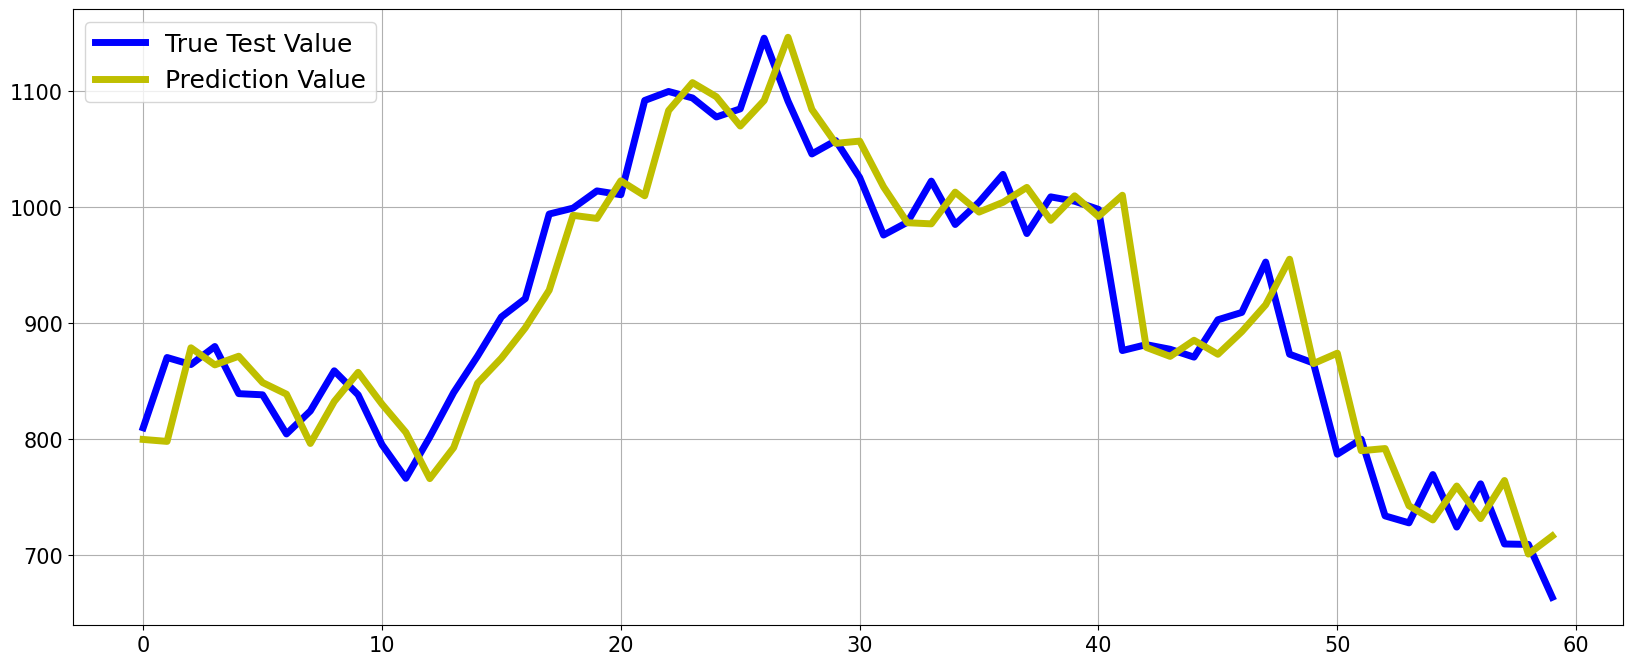

In [38]:
plt.figure(figsize=(20,8))
plt.grid(True)
plt.plot(range(len(test_data)), test_data, color='b', linewidth=5, label='True Test Value')
plt.plot(range(len(predictions)), predictions, color='y', linewidth=5, label='Prediction Value')
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.legend(fontsize= 18, loc='upper left')
plt.show()